In [17]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from livelossplot import PlotLossesKeras  # loss and accuracy plots updating live

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sets imports and formatting

In [18]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")
campaign_test = pd.read_csv("MLUnige2023_subscriptions_test.csv", index_col="Id")

X = campaign_ad.drop(columns='subscription')
y = campaign_ad['subscription']

cat_vars_strings = ['job', 'marital', 'education', 'device', 'outcome_old']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=46)

In [20]:
X_train_input = [X_train['job'],
                 X_train['marital'],
                 X_train['education'],
                 X_train['device'],
                 X_train['outcome_old'],
                 X_train.drop(columns=cat_vars_strings)]

In [21]:
X_valid_input = [X_valid['job'],
                 X_valid['marital'],
                 X_valid['education'],
                 X_valid['device'],
                 X_valid['outcome_old'],
                 X_valid.drop(columns=cat_vars_strings)]

In [22]:
X_test_input =  [X_test['job'],
                 X_test['marital'],
                 X_test['education'],
                 X_test['device'],
                 X_test['outcome_old'],
                 X_test.drop(columns=cat_vars_strings)]

In [23]:
X_input = [X['job'],
           X['marital'],
           X['education'],
           X['device'],
           X['outcome_old'],
           X.drop(columns=cat_vars_strings)]

In [24]:
campaign_test_input = [campaign_test['job'],
                       campaign_test['marital'],
                       campaign_test['education'],
                       campaign_test['device'],
                       campaign_test['outcome_old'],
                       campaign_test.drop(columns=cat_vars_strings)]

# Neural Net construction

In [25]:
keras.utils.set_random_seed(493)

In [26]:
n_levels_job = len(X['job'].unique())

input_job       = layers.Input(name='input_job', shape=(1,), dtype='string')
str_to_ints_job = layers.StringLookup(name='str_to_ints_job', vocabulary=X['job'].unique())(input_job)
embed_vecs_job  = layers.Embedding(name='embed_vecs_job',
                                   input_dim=n_levels_job + 1,
                                   output_dim=6)(str_to_ints_job)
flat_job        = layers.Flatten(name='flat_job')(embed_vecs_job)

In [27]:
n_levels_marital = len(X['marital'].unique())

input_marital       = layers.Input(name='input_marital', shape=(1,), dtype='string')
str_to_ints_marital = layers.StringLookup(name='str_to_ints_marital', vocabulary=X['marital'].unique())(input_marital)
embed_vecs_marital  = layers.Embedding(name='embed_vecs_marital',
                                       input_dim=n_levels_marital + 1,
                                       output_dim=n_levels_marital)(str_to_ints_marital)
flat_marital        = layers.Flatten(name='flat_marital')(embed_vecs_marital)

In [28]:
n_levels_education = len(X['education'].unique())

input_education       = layers.Input(name='input_education', shape=(1,), dtype='string')
str_to_ints_education = layers.StringLookup(name='str_to_ints_education', vocabulary=X['education'].unique())(input_education)
embed_vecs_education  = layers.Embedding(name='embed_vecs_education',
                                         input_dim=n_levels_education + 1,
                                         output_dim=n_levels_education)(str_to_ints_education)
flat_education        = layers.Flatten(name='flat_education')(embed_vecs_education)

In [29]:
n_levels_device = len(X['device'].unique())

input_device       = layers.Input(name='input_device', shape=(1,), dtype='string')
str_to_ints_device = layers.StringLookup(name='str_to_ints_device', vocabulary=X['device'].unique())(input_device)
embed_vecs_device  = layers.Embedding(name='embed_vecs_device',
                                      input_dim=n_levels_device + 1,
                                      output_dim=2)(str_to_ints_device)
flat_device        = layers.Flatten(name='flat_device')(embed_vecs_device)

In [30]:
n_levels_outcome_old = len(X['outcome_old'].unique())

input_outcome_old       = layers.Input(name='input_outcome_old', shape=(1,), dtype='string')
str_to_ints_outcome_old = layers.StringLookup(name='str_to_ints_outcome_old', vocabulary=X['outcome_old'].unique())(input_outcome_old)
embed_vecs_outcome_old  = layers.Embedding(name='embed_vecs_outcome_old',
                                           input_dim=n_levels_outcome_old + 1,
                                           output_dim=2)(str_to_ints_outcome_old)
flat_outcome_old        = layers.Flatten(name='flat_outcome_old')(embed_vecs_outcome_old)

In [31]:
num_inputs = layers.Input(name='num_inputs', shape=(11,))
num_norm = layers.Normalization(name='num_norm', axis=1)(num_inputs)

merged = layers.concatenate([flat_job,
                             flat_marital,
                             flat_education,
                             flat_device,
                             flat_outcome_old,
                             num_norm],
                             name='merged')

dense1 = layers.Dense(name='dense1', units=64, activation='relu')(merged)
dense2 = layers.Dense(name='dense2', units=32, activation='relu')(dense1)
dense3 = layers.Dense(name='dense3', units=16, activation='relu')(dense2)
dense4 = layers.Dense(name='dense4', units=8, activation='relu')(dense3)
dense5 = layers.Dense(name='dense5', units=4, activation='relu')(dense4)
output = layers.Dense(name='output', units=1, activation='sigmoid')(dense5)

In [32]:
model = keras.Model(inputs=[input_job, input_marital, input_education, input_device, input_outcome_old, num_inputs],
                    outputs=[output])

# Neural Net Visualization

In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_job (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_marital (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 input_education (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 input_device (InputLayer)      [(None, 1)]          0           []                               
                                                                                            

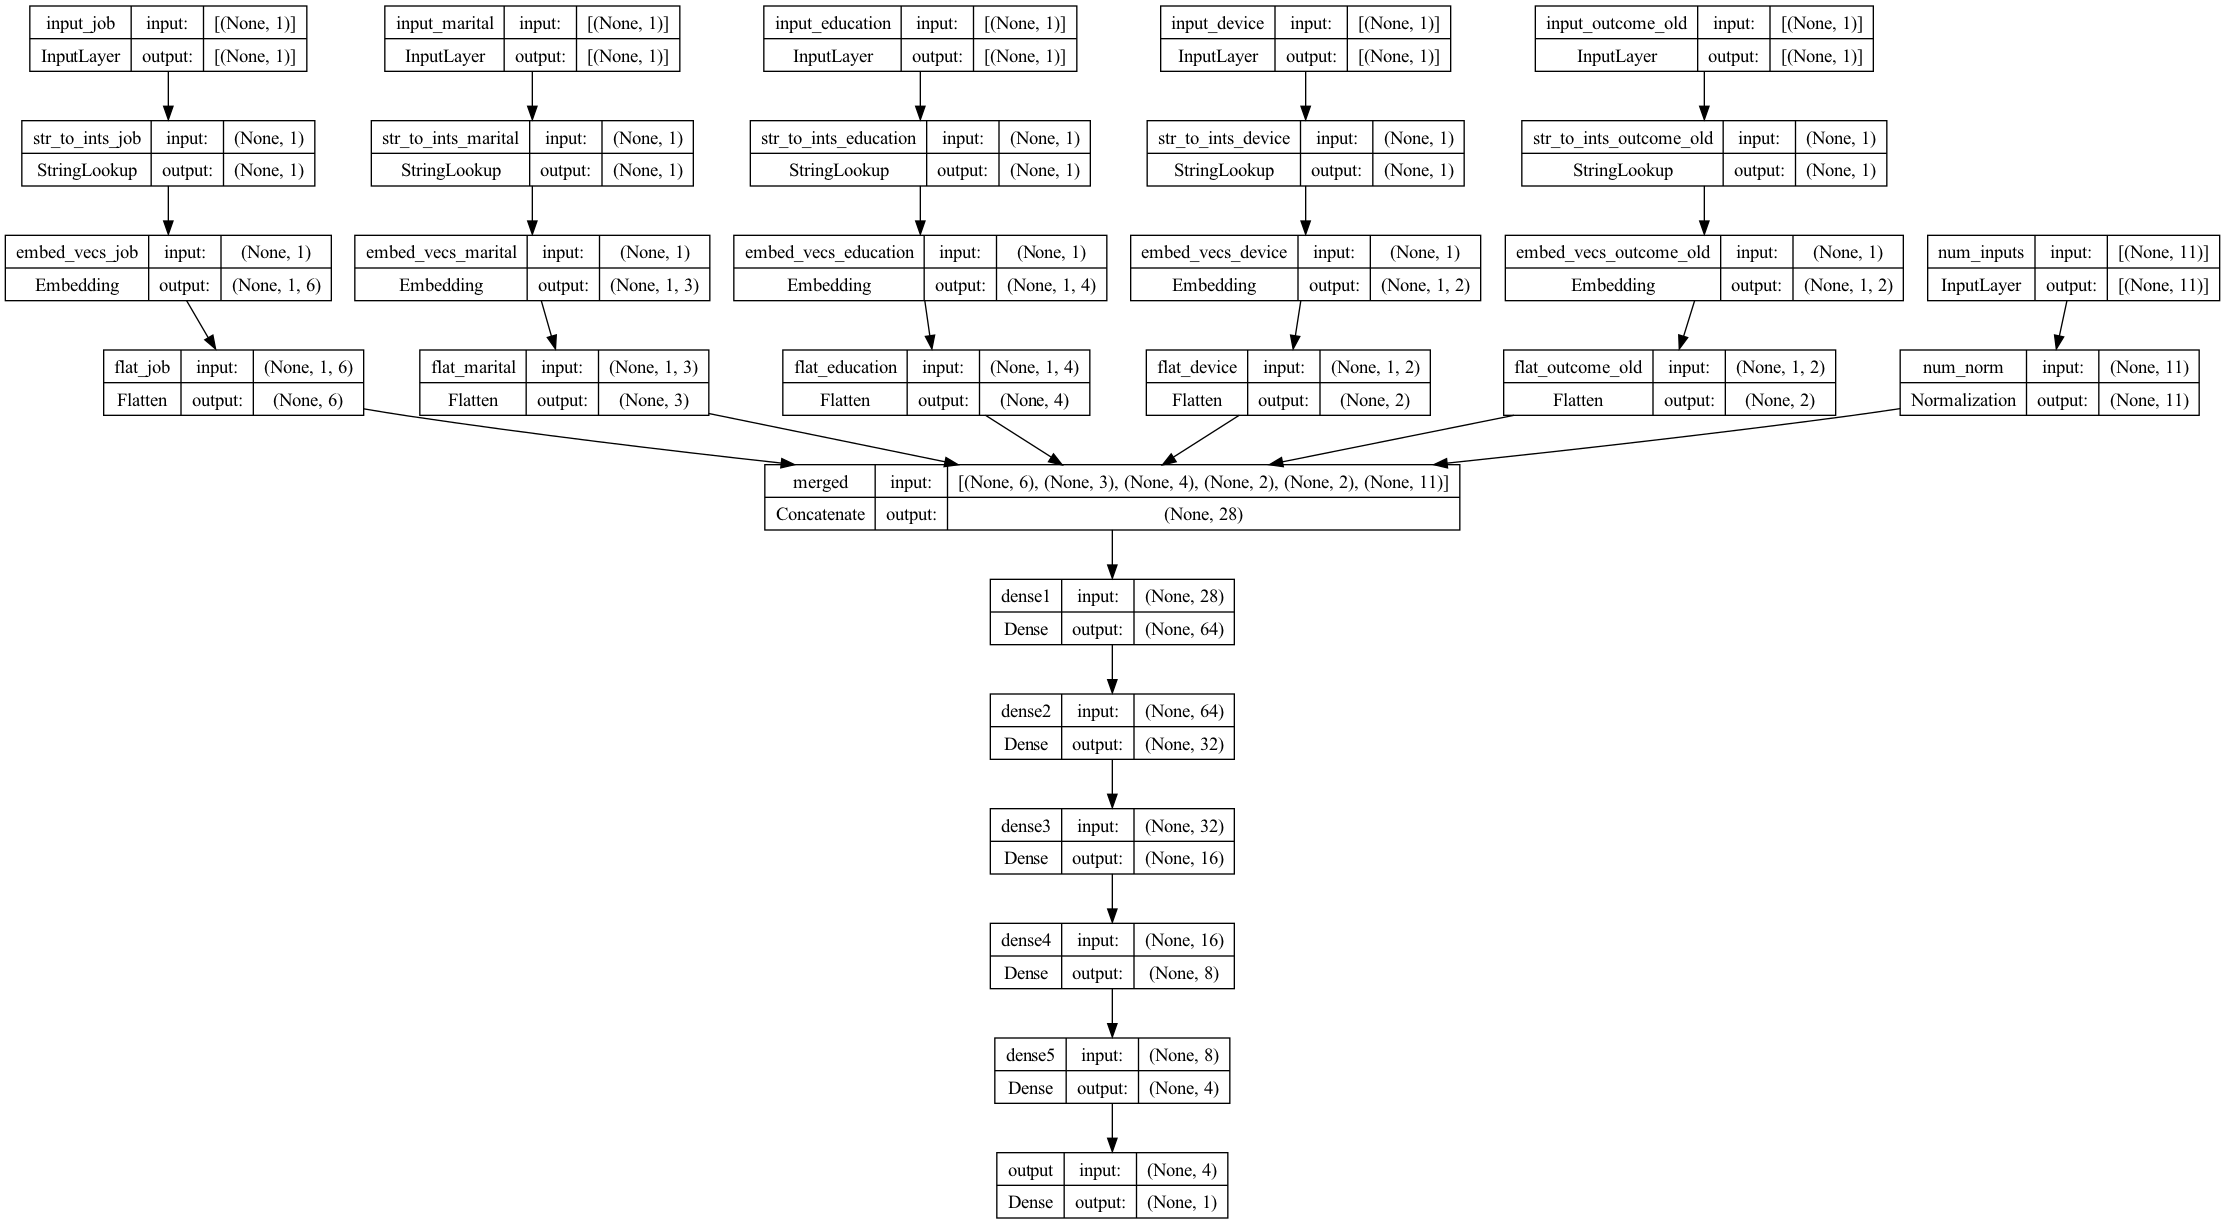

In [34]:
keras.utils.plot_model(model, show_shapes=True)

# Model compilation and fit

In [35]:
model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics= ['accuracy'])

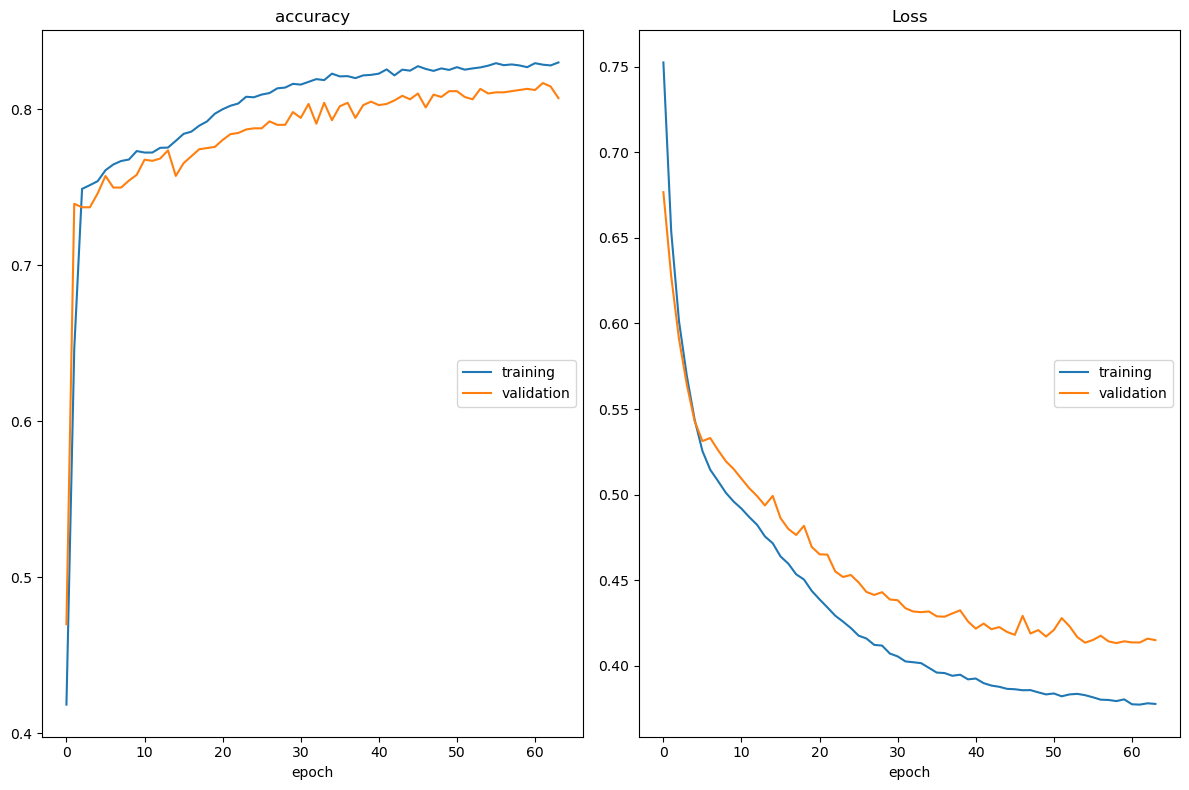

accuracy
	training         	 (min:    0.418, max:    0.830, cur:    0.830)
	validation       	 (min:    0.470, max:    0.817, cur:    0.807)
Loss
	training         	 (min:    0.377, max:    0.753, cur:    0.378)
	validation       	 (min:    0.413, max:    0.677, cur:    0.415)
98/98 [==============================] - 1s 13ms/step - loss: 0.3776 - accuracy: 0.8300 - val_loss: 0.4149 - val_accuracy: 0.8071


In [36]:
fit_history = model.fit(x=X_train_input, y=y_train, 
                        validation_data=(X_valid_input, y_valid),
                        batch_size=64,
                        epochs=100,
                        shuffle=True,
                        callbacks=[PlotLossesKeras(), keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

In [37]:
model.evaluate(X_train_input, y_train)

196/196 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8284


[0.3772937059402466, 0.8284391760826111]

In [38]:
model.evaluate(X_valid_input, y_valid)

42/42 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8071


[0.4148833751678467, 0.8071481585502625]

In [39]:
model.evaluate(X_test_input, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8384


[0.3864672780036926, 0.8384214639663696]

# Grid Search

In [170]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [186]:
def build_model(hp):
    # JOB INPUT
    n_levels_job = len(X['job'].unique())
    input_job       = layers.Input(name='input_job', shape=(1,), dtype='string')
    str_to_ints_job = layers.StringLookup(name='str_to_ints_job', vocabulary=X['job'].unique())(input_job)
    embed_vecs_job  = layers.Embedding(name='embed_vecs_job',
                                    input_dim=n_levels_job + 1,
                                    output_dim=hp.get('output_job'))(str_to_ints_job)
    flat_job        = layers.Flatten(name='flat_job')(embed_vecs_job)

    # MARITAL INPUT
    n_levels_marital = len(X['marital'].unique())
    input_marital       = layers.Input(name='input_marital', shape=(1,), dtype='string')
    str_to_ints_marital = layers.StringLookup(name='str_to_ints_marital', vocabulary=X['marital'].unique())(input_marital)
    embed_vecs_marital  = layers.Embedding(name='embed_vecs_marital',
                                        input_dim=n_levels_marital + 1,
                                        output_dim=n_levels_marital)(str_to_ints_marital)
    flat_marital        = layers.Flatten(name='flat_marital')(embed_vecs_marital)

    # EDUCATION INPUT
    n_levels_education = len(X['education'].unique())
    input_education       = layers.Input(name='input_education', shape=(1,), dtype='string')
    str_to_ints_education = layers.StringLookup(name='str_to_ints_education', vocabulary=X['education'].unique())(input_education)
    embed_vecs_education  = layers.Embedding(name='embed_vecs_education',
                                            input_dim=n_levels_education + 1,
                                            output_dim=n_levels_education)(str_to_ints_education)
    flat_education        = layers.Flatten(name='flat_education')(embed_vecs_education)

    # DEVICE INPUT
    n_levels_device = len(X['device'].unique())
    input_device       = layers.Input(name='input_device', shape=(1,), dtype='string')
    str_to_ints_device = layers.StringLookup(name='str_to_ints_device', vocabulary=X['device'].unique())(input_device)
    embed_vecs_device  = layers.Embedding(name='embed_vecs_device',
                                        input_dim=n_levels_device + 1,
                                        output_dim=2)(str_to_ints_device)
    flat_device        = layers.Flatten(name='flat_device')(embed_vecs_device)

    # OUTCOME_OLD INPUT
    n_levels_outcome_old = len(X['outcome_old'].unique())
    input_outcome_old       = layers.Input(name='input_outcome_old', shape=(1,), dtype='string')
    str_to_ints_outcome_old = layers.StringLookup(name='str_to_ints_outcome_old', vocabulary=X['outcome_old'].unique())(input_outcome_old)
    embed_vecs_outcome_old  = layers.Embedding(name='embed_vecs_outcome_old',
                                            input_dim=n_levels_outcome_old + 1,
                                            output_dim=2)(str_to_ints_outcome_old)
    flat_outcome_old        = layers.Flatten(name='flat_outcome_old')(embed_vecs_outcome_old)

    # NUMERIC INPUTS
    num_inputs = layers.Input(name='num_inputs', shape=(11,))
    num_norm = layers.Normalization(name='num_norm', axis=1)(num_inputs)

    # MERGING INPUTS
    merged = layers.concatenate([flat_job,
                                flat_marital,
                                flat_education,
                                flat_device,
                                flat_outcome_old,
                                num_norm],
                                name='merged')

    # DENSE LAYERS
    dense1 = layers.Dense(name='dense1', units=hp.get('dense1_nodes'), activation='relu')(merged)
    dense2 = layers.Dense(name='dense2', units=16, activation='relu')(dense1)
    dense3 = layers.Dense(name='dense3', units=8, activation='relu')(dense2)
    dense4 = layers.Dense(name='dense4', units=4, activation='relu')(dense3)
    output = layers.Dense(name='output', units=1, activation='sigmoid')(dense4)

    #MODEL
    model = keras.Model(inputs=[input_job, input_marital, input_education, input_device, input_outcome_old, num_inputs],
                        outputs=[output])
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(learning_rate=0.001),
                  metrics= ['accuracy'])
    
    return model

In [187]:
hp = HyperParameters()
hp.Choice('output_job', [6,3,1]);
hp.Choice('dense1_nodes', [64,32,16]);

In [189]:
tuner = RandomSearch(hypermodel = build_model,
                     hyperparameters=hp,
                     max_trials=10, 
                     objective="val_accuracy", 
                     allow_new_entries=False)

In [190]:
tuner.search(x=X_train_input, y=y_train,
             validation_data=(X_valid_input, y_valid),
             batch_size=64,
             epochs=75,
             shuffle=True,
             callbacks=[PlotLossesKeras(), keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Trial 9 Complete [00h 00m 27s]
val_accuracy: 0.8168280124664307

Best val_accuracy So Far: 0.8220402002334595
Total elapsed time: 00h 04m 25s
INFO:tensorflow:Oracle triggered exit


In [191]:
# Show a summary of the search
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
output_job: 6
dense1_nodes: 64
Score: 0.8220402002334595

Trial 02 summary
Hyperparameters:
output_job: 3
dense1_nodes: 64
Score: 0.8198063969612122

Trial 04 summary
Hyperparameters:
output_job: 1
dense1_nodes: 32
Score: 0.818317174911499

Trial 08 summary
Hyperparameters:
output_job: 6
dense1_nodes: 16
Score: 0.8168280124664307

Trial 00 summary
Hyperparameters:
output_job: 3
dense1_nodes: 16
Score: 0.8145942091941833

Trial 06 summary
Hyperparameters:
output_job: 1
dense1_nodes: 16
Score: 0.8138495683670044

Trial 05 summary
Hyperparameters:
output_job: 3
dense1_nodes: 32
Score: 0.8131049871444702

Trial 03 summary
Hyperparameters:
output_job: 1
dense1_nodes: 64
Score: 0.8116157650947571

Trial 01 summary
Hyperparameters:
output_job: 6
dense1_nodes: 32
Score: 0.5778108835220337


In [192]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

In [194]:
a = tuner.get_best_hyperparameters(num_trials=1)[0]
a.get('dense1_nodes')

64

In [45]:
# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_test_input, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8354


# Cutoff search

In [40]:
train_probas = model.predict(X_train_input)
valid_probas = model.predict(X_valid_input)
test_probas = model.predict(X_test_input)

cutoff_table = pd.DataFrame({'cutoff': 1e-2*np.arange(10, 95, 5)})
cutoff_table['train_acc'] = [np.round(accuracy_score(y_train, (train_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['valid_acc'] = [np.round(accuracy_score(y_valid, (valid_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['test_acc'] = [np.round(accuracy_score(y_test, (test_probas > cutoff).astype(int)), 3)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table

42/42 [==============================] - 0s 2ms/step


,cutoff,train_acc,valid_acc,test_acc
0,0.10,0.676,0.664,0.646
1,0.15,0.721,0.709,0.707
2,0.20,0.758,0.738,0.747
3,0.25,0.782,0.759,0.774
4,0.30,0.798,0.777,0.801
5,0.35,0.807,0.785,0.820
6,0.40,0.817,0.794,0.831
7,0.45,0.823,0.800,0.832
8,0.50,0.828,0.807,0.838
9,0.55,0.831,0.812,0.837


In [42]:
cutoff_table = pd.DataFrame({'cutoff': 1e-2*np.arange(40, 65, 1)})
cutoff_table['train_acc'] = [np.round(accuracy_score(y_train, (train_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['valid_acc'] = [np.round(accuracy_score(y_valid, (valid_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table['test_acc'] = [np.round(accuracy_score(y_test, (test_probas > cutoff).astype(int)), 4)
                             for cutoff in cutoff_table['cutoff']]
cutoff_table

,cutoff,train_acc,valid_acc,test_acc
0,0.40,0.8166,0.7945,0.8310
1,0.41,0.8192,0.7960,0.8302
2,0.42,0.8205,0.7975,0.8295
3,0.43,0.8213,0.7990,0.8340
4,0.44,0.8229,0.7990,0.8325
5,0.45,0.8230,0.8004,0.8325
6,0.46,0.8248,0.8027,0.8399
7,0.47,0.8262,0.8057,0.8354
8,0.48,0.8264,0.8057,0.8407
9,0.49,0.8267,0.8071,0.8392


In [43]:
treshold = 0.48

# Fit on whole `X` and prediction on `campaign_test`

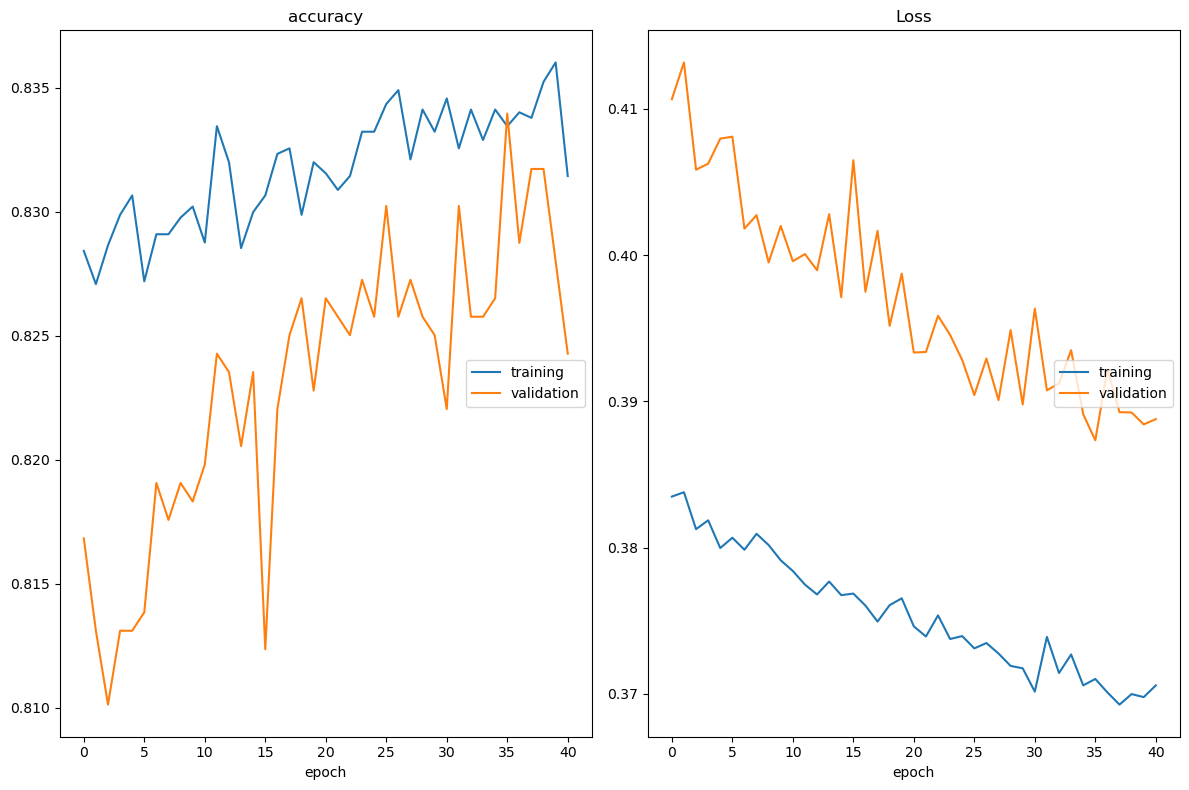

accuracy
	training         	 (min:    0.827, max:    0.836, cur:    0.831)
	validation       	 (min:    0.810, max:    0.834, cur:    0.824)
Loss
	training         	 (min:    0.369, max:    0.384, cur:    0.371)
	validation       	 (min:    0.387, max:    0.413, cur:    0.389)
140/140 [==============================] - 1s 9ms/step - loss: 0.3706 - accuracy: 0.8314 - val_loss: 0.3888 - val_accuracy: 0.8243


In [44]:
fit_history = model.fit(x=X_input, y=y, 
                   validation_data=(X_valid_input, y_valid),
                   batch_size=64,
                   epochs=100,
                   callbacks=[PlotLossesKeras(), keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

In [45]:
model.evaluate(X_input, y)

280/280 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8357


[0.36852073669433594, 0.8356791734695435]

In [46]:
y_REAL_test = (model.predict(campaign_test_input) > treshold).astype(int)
y_REAL_test = y_REAL_test.ravel()
y_REAL_test

120/120 [==============================] - 0s 2ms/step


array([0, 1, 0, ..., 0, 1, 1])

In [47]:
file = open('test_file_neuralnets.csv', 'w')
writer = csv.writer(file)
writer.writerow(['Id', 'subscription'])
for i in range(len(y_REAL_test)):
    writer.writerow([i, y_REAL_test[i]])
file.close()

# Weights vectors of categoricals

In [1000]:
job_weights = pd.DataFrame(model.get_layer('embed_vecs_job').get_weights()[0])

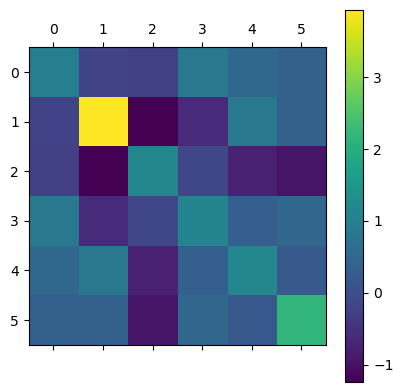

In [1001]:
similarities = np.empty(shape=(6,6))

for i in range(6):
    for j in range(6):
        dot_prod = job_weights.iloc[:,i].dot(job_weights.iloc[:,j])
        similarities[i][j] = dot_prod

import matplotlib.pyplot as plt

plt.matshow(similarities)
cb = plt.colorbar()
plt.show()

In [1002]:
pd.DataFrame(similarities)

,0,1,2,3,4,5
0,1.001211,-0.186597,-0.255103,0.829240,0.505647,0.344947
1,-0.186597,3.936415,-1.242180,-0.623482,0.827553,0.339651
2,-0.255103,-1.242180,1.130049,-0.147550,-0.768152,-0.945809
3,0.829240,-0.623482,-0.147550,1.102371,0.308509,0.463681
4,0.505647,0.827553,-0.768152,0.308509,1.146219,0.203859
5,0.344947,0.339651,-0.945809,0.463681,0.203859,2.159971
